In [21]:
import numpy as np

from openairclim.calc_h2 import run_case
import os
import sys
import xarray as xr
import logging
import glob
from pathlib import Path
# Y_TO_S = 365.25 * 24 * 60 * 60
# M_TO_S = 60 * 60 * 24 * 365.25 / 12
# PPB_TO_CM3 = 2.46e10
# LWH_KER = 43.15  # lower heating potential of kerosene (MJ/kg)
# LWH_H2 = 120.0  # lower heating potential of h2 (MJ/kg)
# BG_PATH = "/repository/h2/SSP_scenarios/"
# SGM_PATH = "/repository/h2/surrogate_models/"
# FUEL_PATH = "/repository/h2/fuel_consumption_scenarios/"


# configure the logger
logging.basicConfig(
    format="%(module)s ln. %(lineno)d in %(funcName)s %(levelname)s: %(message)s",
    level=logging.INFO,
    handlers=[logging.StreamHandler(sys.stdout)],
)

# Example use case
working_dir = Path(os.path.dirname(os.path.abspath(os.getcwd()))).as_posix()
# Fix ROOT_DIR issue

# Run a case with default parameters
result = run_case(
    wd=working_dir,
    scenario="ssp126",
    start_year=2035,
    t_mid=2060,
    m_adp=0.27,
    f_app=0.0300,
    f_del=0.0133,
    f_prod=0.0178,
    kd=0.38,
)



['C:/Users/atzeh/PycharmProjects/OAC_Thesis/repository/h2/SSP_scenarios/bg_ssp126.nc']


KeyboardInterrupt: 

In [9]:
xr.load_dataset(result, engine="h5netcdf")

TypeError: unhashable type: 'Dataset'

In [10]:
print(result)

<xarray.Dataset> Size: 6kB
Dimensions:   (time: 66)
Coordinates:
  * time      (time) datetime64[ns] 528B 2035-01-01 2036-01-01 ... 2100-01-01
Data variables:
    ch4_trop  (time) float64 528B 1.726e-06 1.71e-06 ... 1.055e-06 1.05e-06
    co_trop   (time) float64 528B 6.991e-08 6.964e-08 ... 5.016e-08 5.005e-08
    oh_trop   (time) float64 528B 5.895e-14 5.895e-14 ... 6.3e-14 6.324e-14
    emico     (time) float64 528B 5.336e+11 5.33e+11 ... 3.59e+11 3.533e+11
    emich4    (time) float64 528B 2.62e+11 2.579e+11 ... 1.237e+11 1.222e+11
    h2        (time) float64 528B 6.057e-07 6.023e-07 ... 5.033e-07 5.027e-07
    dch4      (time) float64 528B 1.982e-11 2.118e-11 ... 1.879e-08 1.878e-08
    dco       (time) float64 528B 1.348e-12 1.363e-12 ... 1.269e-09 1.266e-09
    doh       (time) float64 528B -1.518e-18 -1.628e-18 ... -2.756e-15
    dh2       (time) float64 528B 1.216e-10 1.308e-10 ... 1.417e-07 1.422e-07


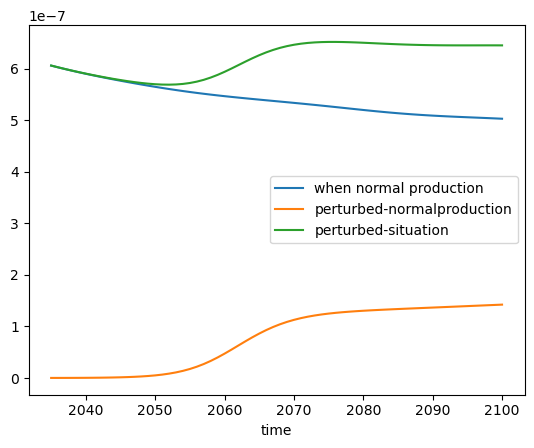

In [24]:
import matplotlib.pyplot as plt
result['h2'].plot(label= 'when normal production')
result['dh2'].plot(label= 'perturbed-normalproduction')
p = result['dh2']+result['h2']
p.plot(label= 'perturbed-situation')
plt.legend()
plt.show()
# result['h2']

In [30]:
import numpy as np
h2_perturbation = np.array(result['dh2'])

# 1500ppbv = 1950-2000 myhre = 130Tg
# 1ppbv = 130/1500
h2_SWV_mass = h2_perturbation*10**9/1500*130
h2_SWV_mass




array([1.05389457e-02, 1.13369828e-02, 1.34873354e-02, 1.69731963e-02,
       2.19514091e-02, 2.87471148e-02, 3.78442945e-02, 4.99061998e-02,
       6.58274727e-02, 8.67605242e-02, 1.14205358e-01, 1.50051053e-01,
       1.96667086e-01, 2.57193210e-01, 3.35640244e-01, 4.36501697e-01,
       5.66579054e-01, 7.32171157e-01, 9.39900491e-01, 1.19793124e+00,
       1.51424021e+00, 1.89555332e+00, 2.34612835e+00, 2.86632266e+00,
       3.45139787e+00, 4.09097259e+00, 4.76929090e+00, 5.46672411e+00,
       6.16201370e+00, 6.83480852e+00, 7.46799592e+00, 8.04907173e+00,
       8.57030125e+00, 9.02940459e+00, 9.42728610e+00, 9.76787629e+00,
       1.00567508e+01, 1.03003046e+01, 1.05050539e+01, 1.06772237e+01,
       1.08224868e+01, 1.09461364e+01, 1.10522790e+01, 1.11444808e+01,
       1.12255906e+01, 1.12979906e+01, 1.13636917e+01, 1.14242860e+01,
       1.14810344e+01, 1.15349721e+01, 1.15868888e+01, 1.16374144e+01,
       1.16870329e+01, 1.17361089e+01, 1.17849143e+01, 1.18336438e+01,
      

In [31]:
rf_swv_list = []
a = -0.00088
b = 0.47373
c = -0.74676
for value in h2_SWV_mass:
    negative = False
    if value < 0:
        negative = True
        value = abs(value)
    if value > 160 or value < -1.58:
        raise ValueError("Total SWV mass out of range of Pletzer plot")
    rf_value = (a * value**2 + b * value + c) / 1000  # to make it W/m2 from mW/m2
    rf_swv_list.append(rf_value)
rf_swv_list

[np.float64(-0.0007417674829782306),
 np.float64(-0.0007413894442298481),
 np.float64(-0.0007403708046851944),
 np.float64(-0.0007387195412429861),
 np.float64(-0.0007363613829916792),
 np.float64(-0.0007331423565331205),
 np.float64(-0.0007288332827024745),
 np.float64(-0.0007231201277196489),
 np.float64(-0.0007155793646075083),
 np.float64(-0.0007056655609602112),
 np.float64(-0.0006926689733190529),
 np.float64(-0.0006756961280175459),
 np.float64(-0.0006536269379137922),
 np.float64(-0.000624978071404193),
 np.float64(-0.0005878562830924592),
 np.float64(-0.0005401437205414695),
 np.float64(-0.0004786369953719435),
 np.float64(-0.00040038030334215786),
 np.float64(-0.00030227834398406444),
 np.float64(-0.0001805268690882229),
 np.float64(-3.143675740785412e-05),
 np.float64(0.00014805852640018403),
 np.float64(0.00035982758393175826),
 np.float64(0.000603873125550985),
 np.float64(0.0008777880246894264),
 np.float64(0.001176528716043058),
 np.float64(0.0014925795794754797),
 np.fl